# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#%pip install matplotlib-venn
from matplotlib_venn import venn2


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [10]:
filename = 'data/Bachelor-data.xlsx' # open the file
df = pd.read_excel(filename)
df.rename(columns={'Unnamed: 0':'year'}, inplace = True) # rename the unnamed year column to year



<AxesSubplot: title={'center': 'Swedish Phillips-curve 1990Q1-2020Q1'}, xlabel='Unemployment rate', ylabel='CPI'>

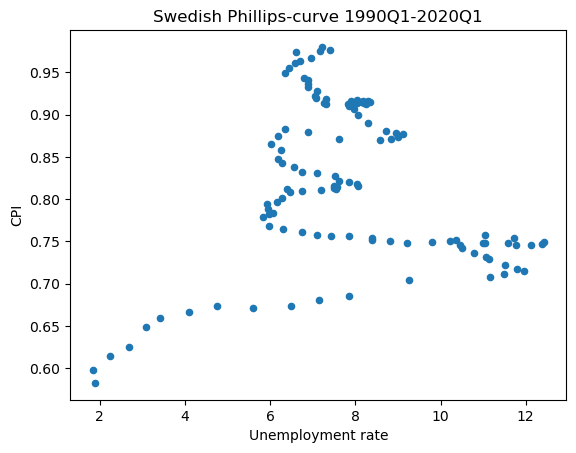

In [11]:
df.plot.scatter(x = 'Unemployment rate', y = 'CPI',title='Swedish Phillips-curve 1990Q1-2020Q1')

In [12]:
l =[]
for j, i in enumerate(df.year.values):

    if j%4==0 :
        pass
    else:
        i = '' 
    l.append(i)
l = np.array(l)    


C:\Users\caspe\AppData\Local\Temp\ipykernel_15540\3702975086.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(l,rotation= 90)


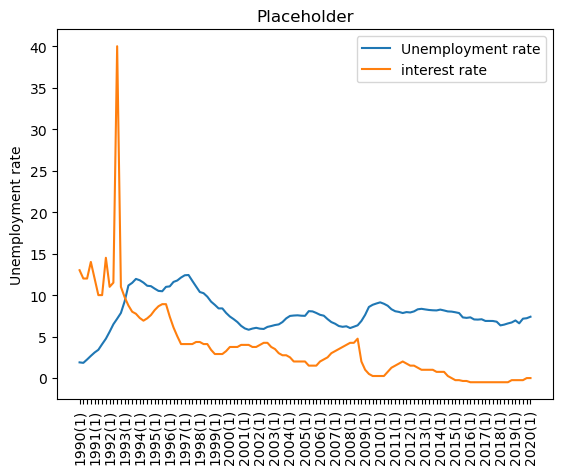

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['year'],df['Unemployment rate'], label = 'Unemployment rate')
ax.plot(df['year'],df['Central bank key interest rate'], label = 'interest rate')
ax.set_xticklabels(l,rotation= 90)
ax.set_ylabel('Unemployment rate')
ax.set_title('Placeholder')
ax.legend(loc='upper right')
plt.show()

In [14]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.